# Laboratorio 7. Series de Taylor. Loops.

Nombre: Simón Aparicio Bocanegra

En este notebook vamos a revisar como crear Series de Taylor con Python y ciclos.

Una Serie de Taylor es una serie infinita de terminos matematicas que sumada aproxima una función matemática.


Aquí tenemos una lista de funciones y las Series de Taylor que las aproximan.

| FUNCIÓN MATEMÁTICA         | INICIO DE SERIE DE TAYLOR EXPANDIDA         | FORMULA SERIE DE TAYLOR |
| :----------------------:   | :-----------------------------------------: | :--:|
| $e^x=$                     | ${\small 1+x}+\frac{x^2}{2!}+\frac{x^3}{3!}\cdots=$ | $$ \sum_{k=0}^{\infty} \frac{x^k}{k!} $$ |
| $\sin x=$                  | $x-\frac{x^3}{3!}+\frac{x^5}{5!}-\cdots=$   | $$ \sum_{k=0}^{\infty} (-1)^k\frac{x^{2k+1}}{(2k+1)!} $$ |
| $\cos x=$                  | $1-\frac{x^2}{2!}+\frac{x^4}{4!}-\cdots=$   | $$ \sum_{k=0}^{\infty} (-1)^k\frac{x^{2k}}{(2k)!} $$ |
| $\frac{1}{1-x}=$           | $\small 1+x+x^2+x^3+\cdots=$                | $$ \sum_{k=0}^{\infty} x^k $$ |
| $\ln (1+x)=$               | $x-\frac{x^2}{2}+\frac{x^3}{3}-\cdots=$     | $$ \sum_{k=1}^{\infty} (-1)^{k-1}\frac{x^k}{k} $$ |
| $\ln(x)=$                  | ${\small (x-1)}-\frac{(x-1)^2}{2}+\frac{(x-1)^3}{3}-\cdots=$ | $$ \sum_{k=1}^{\infty} (-1)^{k-1}\frac{(x-1)^k}{k} $$ |


## $e^x$

Supongamos que queramos calcular el valor de $e^2$ utilizando series de taylor.

Incialmente podemos hallar sumar los terminos de la serie de taylor.

In [ ]:
import math

x = 2
e_to_2 = x**0/math.factorial(0) + x**1/math.factorial(1) + x**2/math.factorial(2) + x**3/math.factorial(3) + x**4/math.factorial(4)
print(e_to_2)

7.0


Comparandola con el valor real utilizando la función `math.exp()` obtenemos:

In [ ]:
print(math.exp(2))

7.38905609893065


Podemos lograr mayor precisión si agregamos mas terminos a la serie, pero agregar terminos individualmente es repetitivo y demorado. Un ciclo nos permitiria realizar esta operación de manera más sencilla.

In [ ]:
x = 2
e_to_2 = 0
for i in range(5):
    e_to_2 += x**i/math.factorial(i)
    
print(e_to_2)

7.0


El resultado obtenido es el mismo que habiamos hallado antes, podemos ahora agregar mas terminos iterando un mayor número de veces.

In [ ]:
x = 2
e_to_2 = 0
for i in range(10):
    e_to_2 += x**i/math.factorial(i)
    
print(e_to_2)

7.3887125220458545


Vemos que obtenemos al 3 cifras significativas correctas con 10 iteraciones.

La siguiente mejora seria generalizar este procedimiento en una función que no pueda recibir un $n$ (número de iteraciones) sino tambien el valor $x$ sobre el cual queremos calcular $e^x$

In [ ]:
def func_e(x, n):
    e_approx = 0
    for i in range(n):
        e_approx += x**i/math.factorial(i)
    
    return e_approx

Calculemos ahora $e^2$ y $e^5$ con 10 y 15 iteraciones y comparemos estos valores con la función `math.exp()`.

In [ ]:
print('func\t','10 iter.\t\t','15 iter.\t\t','math.exp()')
print('e^2\t',func_e(2,10),'\t',func_e(2,15),'\t',math.exp(2))
print('e^5\t',func_e(5,10),'\t',func_e(5,15),'\t',math.exp(5))

func	 10 iter.		 15 iter.		 math.exp()
e^2	 7.3887125220458545 	 7.3890560703259105 	 7.38905609893065
e^5	 143.68945656966488 	 148.37958007973663 	 148.4131591025766


Observamos que con un mayor número de iteraciones obtenemos mayor presición.

Podemos tambien utilizar una un ciclo para calcular la diferencia entre la expansión de la Serie de Taylor y el cálculo de la función `exp()` en Python. 

In [ ]:
x = 5
for i in range(1,11):
    e_approx = func_e(x,i)
    e_exp = math.exp(x)
    e_error = abs(e_approx - e_exp)
    print(f'{i} terms: Taylor Series approx= {e_approx}, exp calc= {e_exp}, error = {e_error}')

1 terms: Taylor Series approx= 1.0, exp calc= 148.4131591025766, error = 147.4131591025766
2 terms: Taylor Series approx= 6.0, exp calc= 148.4131591025766, error = 142.4131591025766
3 terms: Taylor Series approx= 18.5, exp calc= 148.4131591025766, error = 129.9131591025766
4 terms: Taylor Series approx= 39.33333333333333, exp calc= 148.4131591025766, error = 109.07982576924327
5 terms: Taylor Series approx= 65.375, exp calc= 148.4131591025766, error = 83.0381591025766
6 terms: Taylor Series approx= 91.41666666666667, exp calc= 148.4131591025766, error = 56.99649243590993
7 terms: Taylor Series approx= 113.11805555555556, exp calc= 148.4131591025766, error = 35.29510354702104
8 terms: Taylor Series approx= 128.61904761904762, exp calc= 148.4131591025766, error = 19.79411148352898
9 terms: Taylor Series approx= 138.30716765873015, exp calc= 148.4131591025766, error = 10.105991443846449
10 terms: Taylor Series approx= 143.68945656966488, exp calc= 148.4131591025766, error = 4.723702532911

Vemos que el error disminuye bastante rapido a medida que vamos agregando terminos. Podemos tambien intentar buscar un error máximo e iterar hasta lograr reducir el error al nivel deseado.

In [ ]:
x = 5
e_exp = math.exp(x)
for i in range(1,100):
    e_approx = func_e(x,i)
    e_error = abs(e_approx - e_exp)
    if e_error < 1e-4:
        break
        
print(f'{i} terms: Taylor Series approx= {e_approx}, exp calc= {e_exp}, error = {e_error}')

20 terms: Taylor Series approx= 148.4131078683383, exp calc= 148.4131591025766, error = 5.1234238299002755e-05


Para la serie de Taylor para $f(x) = e^x$ sobre $c=0$ (Maclaurin) 

$$ E_n = \frac{f^{(n)}(\xi)}{n!}(x-c)^{n} = \frac{e^\xi}{n!}x^{n} \le  \frac{e^x}{n!}x^{n}, $$

dado que si queremos $E_n \le \epsilon$ necesitamos un $n$ que cumpla: 

$$ \frac{e^x}{n!}x^{n} < \epsilon$$ 

porque $e^x \ge e^\xi$, para  $0 \le \xi \le x$.

Es interesante analizar la diferencia entre la función aproximada con 3 terminos y la función teorica.

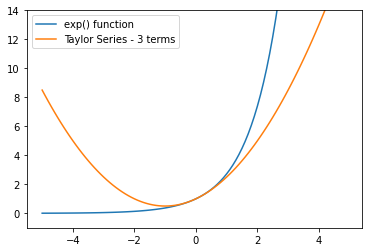

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_exp = np.exp(values)
t_exp = [func_e(value,3) for value in values]

fig, ax = plt.subplots()
ax.plot(values,p_exp)
ax.plot(values,t_exp)
ax.set_ylim([-1,14])
ax.legend(['exp() function','Taylor Series - 3 terms'])

plt.show()

Observamos que la función aproximada se acerca a la función teorica alrededor de 0 y el error aumenta para los valores alejados, 3 terminos nos dan un rango de valores con error bajo muy pequeño. Podemos ahora comparar la función teórica con la aproximada con un número mayor de terminos en la serie.

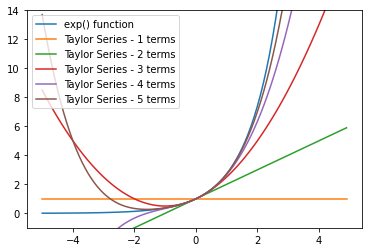

In [ ]:
values = np.arange(-5,5,0.1)
p_exp = np.exp(values)

fig, ax = plt.subplots()
ax.plot(values,p_exp)

# add lines for between 1 and 6 terms in the Taylor Series
for i in range(1,6):
    t_exp = [func_e(value,i) for value in values]
    ax.plot(values,t_exp)

ax.set_ylim([-1,14])

# set up legend
legend_lst = ['exp() function']
for i in range(1,6):
    legend_lst.append(f'Taylor Series - {i} terms')
ax.legend(legend_lst, loc=2)

plt.show()

## $\sin x$

Creamos una función que retorna el valor aproximado de la función ***sin*** para un valor x utilizando n terminos de la Serie de Taylor.

In [ ]:
def func_sin(x, n):
    sin_approx = 0
    for i in range(n):
        sin_approx += (-1)**i*x**(2*i+1)/math.factorial(2*i+1)
    
    return sin_approx

In [ ]:
x = math.pi/2
for i in range(1,11):
    sin_approx = func_sin(x,i)
    sin_exp = math.sin(x)
    sin_error = abs(sin_approx - sin_exp)
    print(f'{i} terms: Taylor Series approx= {sin_approx}, exp calc= {sin_exp}, error = {sin_error}')

1 terms: Taylor Series approx= 1.5707963267948966, exp calc= 1.0, error = 0.5707963267948966
2 terms: Taylor Series approx= 0.9248322292886504, exp calc= 1.0, error = 0.07516777071134961
3 terms: Taylor Series approx= 1.0045248555348174, exp calc= 1.0, error = 0.004524855534817407
4 terms: Taylor Series approx= 0.9998431013994987, exp calc= 1.0, error = 0.00015689860050127624
5 terms: Taylor Series approx= 1.0000035425842861, exp calc= 1.0, error = 3.542584286142514e-06
6 terms: Taylor Series approx= 0.999999943741051, exp calc= 1.0, error = 5.625894905492146e-08
7 terms: Taylor Series approx= 1.0000000006627803, exp calc= 1.0, error = 6.627802751069112e-10
8 terms: Taylor Series approx= 0.9999999999939768, exp calc= 1.0, error = 6.023181953196399e-12
9 terms: Taylor Series approx= 1.0000000000000437, exp calc= 1.0, error = 4.374278717023117e-14
10 terms: Taylor Series approx= 1.0, exp calc= 1.0, error = 0.0


Vemos que el error disminuye bastante rapido a medida que vamos agregando terminos. Podemos tambien intentar buscar un error máximo e iterar hasta lograr reducir el error al nivel deseado.

In [ ]:
x = math.pi
sin_exp = math.sin(x)
for i in range(1,100):
    sin_approx = func_sin(x,i)
    sin_error = abs(sin_approx - sin_exp)
    if sin_error < 1e-4:
        break
        
print(f'{i} terms: Taylor Series approx= {sin_approx}, exp calc= {sin_exp}, error = {sin_error}')

20 terms: Taylor Series approx= 148.4131078683383, exp calc= 148.4131591025766, error = 5.1234238299002755e-05


Para la serie de Taylor para $f(x) = \sin x$ sobre $c=0$ (Maclaurin) 

$$ E_n = \left\lvert \frac{f^{(n)}(\xi)}{n!}(x-c)^{n} \right\rvert = \left\lvert \frac{(-1)^{\frac{n-1}{2}}\cos\xi}{n!}x^{n} \right\rvert \le \left\lvert \frac{(-1)^{\frac{n-1}{2}}\cos x}{n!}x^{n} \right\rvert ,\text{para un $n$ impar} $$

dado que si queremos $E_n \le \epsilon$ necesitamos un $n$ que cumpla: 

$$ \left\lvert\frac{(-1)^{\frac{n-1}{2}}\cos x}{n!}x^{n} \right\rvert < \epsilon$$ 

porque $e^x \ge e^\xi$, para  $0 \le \xi \le x$.

Podemos ahora comparar la función teórica con la aproximada con un número mayor de terminos en la serie.

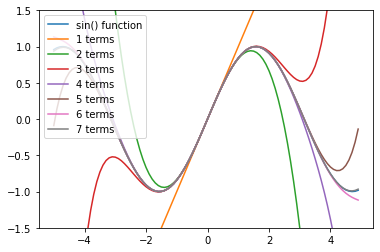

In [ ]:
values = np.arange(-5,5,0.1)
teo_vals = np.sin(values)

fig, ax = plt.subplots()
ax.plot(values,teo_vals)

# add lines for between 1 and 6 terms in the Taylor Series
for i in range(1,8):
    aprox_vals = [func_sin(value,i) for value in values]
    ax.plot(values,aprox_vals)

ax.set_ylim([-1.5,1.5])

# set up legend
legend_lst = ['sin() function']
for i in range(1,8):
    legend_lst.append(f'{i} terms')
ax.legend(legend_lst, loc=2)

plt.show()

## $\cos x$

Creamos una función que retorna el valor aproximado de la función ***cos*** para un valor x utilizando n terminos de la Serie de Taylor.

In [ ]:
def func_cos(x, n):
    cos_approx = 0
    for i in range(n):
        cos_approx += (-1)**i*x**(2*i)/math.factorial(2*i)
    
    return cos_approx

In [ ]:
x = math.pi/2
for i in range(1,11):
    cos_approx = func_cos(x,i)
    cos_exp = math.cos(x)
    cos_error = abs(cos_approx - cos_exp)
    print(f'{i} terms: Taylor Series approx= {cos_approx}, exp calc= {cos_exp}, error = {cos_error}')

1 terms: Taylor Series approx= 1.0, exp calc= 6.123233995736766e-17, error = 0.9999999999999999
2 terms: Taylor Series approx= -0.23370055013616975, exp calc= 6.123233995736766e-17, error = 0.2337005501361698
3 terms: Taylor Series approx= 0.019968957764878226, exp calc= 6.123233995736766e-17, error = 0.019968957764878163
4 terms: Taylor Series approx= -0.0008945229984747317, exp calc= 6.123233995736766e-17, error = 0.000894522998474793
5 terms: Taylor Series approx= 2.473727636469452e-05, exp calc= 6.123233995736766e-17, error = 2.4737276364633286e-05
6 terms: Taylor Series approx= -4.6476600836607633e-07, exp calc= 6.123233995736766e-17, error = 4.6476600842730866e-07
7 terms: Taylor Series approx= 6.321469515740575e-09, exp calc= 6.123233995736766e-17, error = 6.321469454508235e-09
8 terms: Taylor Series approx= -6.513356805127347e-11, exp calc= 6.123233995736766e-17, error = 6.513362928361342e-11
9 terms: Taylor Series approx= 5.260630985212103e-13, exp calc= 6.123233995736766e-17,

Vemos que el error disminuye bastante rapido a medida que vamos agregando terminos. Podemos tambien intentar buscar un error máximo e iterar hasta lograr reducir el error al nivel deseado.

In [ ]:
x = math.pi/2
cos_exp = math.cos(x)
for i in range(1,100):
    cos_approx = func_cos(x,i)
    cos_error = abs(cos_approx - cos_exp)
    if cos_error < 1e-4:
        break
        
print(f'{i} terms: Taylor Series approx= {cos_approx}, exp calc= {cos_exp}, error = {cos_error}')

20 terms: Taylor Series approx= 148.4131078683383, exp calc= 148.4131591025766, error = 5.1234238299002755e-05


Para la serie de Taylor para $f(x) = \sin x$ sobre $c=0$ (Maclaurin) 

$$ E_n = \frac{f^{(n)}(\xi)}{n!}(x-c)^{n} = \frac{(-1)^{\frac{n}{2}}\cos\xi}{n!}x^{n} \le  \frac{(-1)^{\frac{n}{2}}\cos x}{n!}x^{n},\text{para un $n$ par} $$

dado que si queremos $E_n \le \epsilon$ necesitamos un $n$ que cumpla: 

$$ \frac{(-1)^{\frac{n}{2}}\cos x}{n!}x^{n} < \epsilon$$ 

porque $e^x \ge e^\xi$, para  $0 \le \xi \le x$.

Para la serie de Taylor para $f(x) = \cos x$ sobre $c=0$ (Maclaurin) 

$$ E_n = \left\lvert \frac{f^{(n)}(\xi)}{n!}(x-c)^{n} \right\rvert = \left\lvert \frac{(-1)^{\frac{n}{2}}\cos\xi}{n!}x^{n} \right\rvert \le \left\lvert \frac{(-1)^{\frac{n}{2}}\cos x}{n!}x^{n} \right\rvert ,\text{para un $n$ par} $$

dado que si queremos $E_n \le \epsilon$ necesitamos un $n$ que cumpla: 

$$ \left\lvert\frac{(-1)^{\frac{n}{2}}\cos x}{n!}x^{n} \right\rvert < \epsilon$$ 

porque $e^x \ge e^\xi$, para  $0 \le \xi \le x$.

Podemos ahora comparar la función teórica con la aproximada con un número mayor de terminos en la serie.

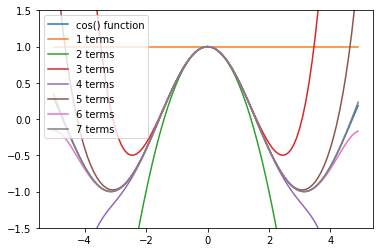

In [ ]:
values = np.arange(-5,5,0.1)
teo_vals = np.cos(values)

fig, ax = plt.subplots()
ax.plot(values,teo_vals)

# add lines for between 1 and 6 terms in the Taylor Series
for i in range(1,8):
    aprox_vals = [func_cos(value,i) for value in values]
    ax.plot(values,aprox_vals)

ax.set_ylim([-1.5,1.5])

# set up legend
legend_lst = ['cos() function']
for i in range(1,8):
    legend_lst.append(f'{i} terms')
ax.legend(legend_lst, loc=2)

plt.show()

## $\frac{1}{1-x}$

Creamos una función que retorna el valor aproximado de la función ***1/(1-x)*** para un valor x utilizando n terminos de la Serie de Taylor.

In [ ]:
def func_f1(x, n):
    f1_approx = 0
    for i in range(n):
        f1_approx += x**i
    
    return f1_approx

In [ ]:
x = 0.5
for i in range(1,11):
    f1_approx = func_f1(x,i)
    f1_exp = 1/(1-x)
    f1_error = abs(f1_approx - f1_exp)
    print(f'{i} terms: Taylor Series approx= {f1_approx}, exp calc= {f1_exp}, error = {f1_error}')

1 terms: Taylor Series approx= 1.0, exp calc= 2.0, error = 1.0
2 terms: Taylor Series approx= 1.5, exp calc= 2.0, error = 0.5
3 terms: Taylor Series approx= 1.75, exp calc= 2.0, error = 0.25
4 terms: Taylor Series approx= 1.875, exp calc= 2.0, error = 0.125
5 terms: Taylor Series approx= 1.9375, exp calc= 2.0, error = 0.0625
6 terms: Taylor Series approx= 1.96875, exp calc= 2.0, error = 0.03125
7 terms: Taylor Series approx= 1.984375, exp calc= 2.0, error = 0.015625
8 terms: Taylor Series approx= 1.9921875, exp calc= 2.0, error = 0.0078125
9 terms: Taylor Series approx= 1.99609375, exp calc= 2.0, error = 0.00390625
10 terms: Taylor Series approx= 1.998046875, exp calc= 2.0, error = 0.001953125


Vemos que el error disminuye bastante rapido a medida que vamos agregando terminos. Podemos tambien intentar buscar un error máximo e iterar hasta lograr reducir el error al nivel deseado.

In [ ]:
x = 0.5
f1_exp = 1/(1-x)
for i in range(1,100):
    f1_approx = func_f1(x,i)
    f1_error = abs(f1_approx - f1_exp)
    if f1_error < 1e-4:
        break
        
print(f'{i} terms: Taylor Series approx= {f1_approx}, exp calc= {f1_exp}, error = {f1_error}')

15 terms: Taylor Series approx= 1.99993896484375, exp calc= 2.0, error = 6.103515625e-05


Para la serie de Taylor para $f(x) = \frac{1}{1-x}$ sobre $c=0$ (Maclaurin) 

$$ E_n = \frac{f^{(n)}(\xi)}{n!}(x-c)^{n} = \frac{n!}{n!(1-\xi)^n}x^{n} = \frac{1}{(1-\xi)^n}x^{n} \le  \frac{1}{(1-x)^n}x^{n},$$

dado que si queremos $E_n \le \epsilon$ necesitamos un $n$ que cumpla: 

$$ \frac{1}{(1-x)^n}x^{n} < \epsilon$$ 

porque $e^x \ge e^\xi$, para  $0 \le \xi \le x$.

Podemos ahora comparar la función teórica con la aproximada con un número mayor de terminos en la serie.

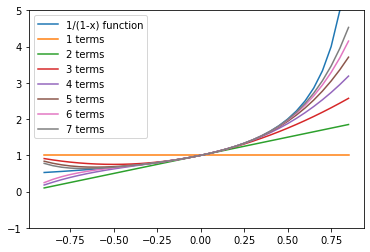

In [ ]:
%matplotlib inline

values = np.arange(-0.9,0.9,0.05)
teo_vals = 1/(1-values)

fig, ax = plt.subplots()
ax.plot(values,teo_vals)

# add lines for between 1 and 6 terms in the Taylor Series
for i in range(1,8):
    aprox_vals = [func_f1(value,i) for value in values]
    ax.plot(values,aprox_vals)

ax.set_ylim([-1,5])

# set up legend
legend_lst = ['1/(1-x) function']
for i in range(1,8):
    legend_lst.append(f'{i} terms')
ax.legend(legend_lst, loc=2)

plt.show()

## $\ln(1+x)$

Creamos una función que retorna el valor aproximado de la función ***ln(x+1)*** para un valor x utilizando n terminos de la Serie de Taylor.

In [ ]:
def func_ln1(x, n):
    ln1_approx = 0
    for i in range(1,n):
        ln1_approx += (-1)**(i-1)*x**i/i
    
    return ln1_approx

In [ ]:
x = 0.5
for i in range(1,11):
    ln1_approx = func_ln1(x,i)
    ln1_exp = math.log1p(x)
    ln1_error = abs(ln1_approx - ln1_exp)
    print(f'{i} terms: Taylor Series approx= {ln1_approx}, exp calc= {ln1_exp}, error = {ln1_error}')

1 terms: Taylor Series approx= 0, exp calc= 0.4054651081081644, error = 0.4054651081081644
2 terms: Taylor Series approx= 0.5, exp calc= 0.4054651081081644, error = 0.09453489189183562
3 terms: Taylor Series approx= 0.375, exp calc= 0.4054651081081644, error = 0.030465108108164385
4 terms: Taylor Series approx= 0.4166666666666667, exp calc= 0.4054651081081644, error = 0.0112015585585023
5 terms: Taylor Series approx= 0.4010416666666667, exp calc= 0.4054651081081644, error = 0.0044234414414977
6 terms: Taylor Series approx= 0.40729166666666666, exp calc= 0.4054651081081644, error = 0.001826558558502278
7 terms: Taylor Series approx= 0.4046875, exp calc= 0.4054651081081644, error = 0.0007776081081644071
8 terms: Taylor Series approx= 0.40580357142857143, exp calc= 0.4054651081081644, error = 0.0003384633204070453
9 terms: Taylor Series approx= 0.40531529017857143, exp calc= 0.4054651081081644, error = 0.0001498179295929547
10 terms: Taylor Series approx= 0.4055323040674603, exp calc= 0.4

Vemos que el error disminuye bastante rapido a medida que vamos agregando terminos. Podemos tambien intentar buscar un error máximo e iterar hasta lograr reducir el error al nivel deseado.

In [ ]:
x = 1
ln1_exp = math.log1p(x)
for i in range(1,100):
    ln1_approx = func_ln1(x,i)
    ln1_error = abs(ln1_approx - ln1_exp)
    if ln1_error < 1e-4:
        break
        
print(f'{i} terms: Taylor Series approx= {ln1_approx}, exp calc= {ln1_exp}, error = {ln1_error}')

51 terms: Taylor Series approx= 0.6832471605759183, exp calc= 0.6931471805599453, error = 0.009900019984027009


Para la serie de Taylor para $f(x) = \ln (1+x)$ sobre $c=0$ (Maclaurin) 

$$ E_n = \left\lvert \frac{f^{(n)}(\xi)}{n!}(x-c)^{n} \right\rvert = \left\lvert \frac{(-1)^{n-1}(n-1)!}{n!(1+\xi)^n}x^{n} \right\rvert =  \left\lvert \frac{(-1)^{n-1}}{n(1+\xi)^n}x^{n} \right\rvert \le \left\lvert \frac{(-1)^{n-1}}{n(1+x)^n}x^{n} \right\rvert, $$

dado que si queremos $E_n \le \epsilon$ necesitamos un $n$ que cumpla: 

$$ \left\lvert\frac{(-1)^{n-1}}{n(1+x)^n}x^{n} \right\rvert < \epsilon$$ 

porque $e^x \ge e^\xi$, para  $0 \le \xi \le x$.

Podemos ahora comparar la función teórica con la aproximada con un número mayor de terminos en la serie.

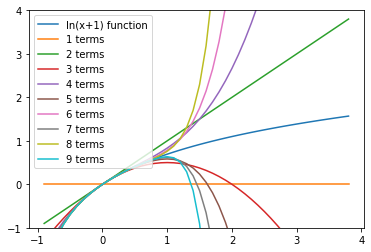

In [ ]:
values = np.arange(-0.9,3.9,0.1)
teo_vals = np.log(values+1)

fig, ax = plt.subplots()
ax.plot(values,teo_vals)

# add lines for between 1 and 6 terms in the Taylor Series
for i in range(1,10):
    aprox_vals = [func_ln1(value,i) for value in values]
    ax.plot(values,aprox_vals)

ax.set_ylim([-1,4])

# set up legend
legend_lst = ['ln(x+1) function']
for i in range(1,10):
    legend_lst.append(f'{i} terms')
ax.legend(legend_lst, loc=2)

plt.show()

## $\ln x$

Creamos una función que retorna el valor aproximado de la función ***ln(x)*** para un valor x utilizando n terminos de la Serie de Taylor.

In [ ]:
def func_ln(x, n):
    ln_approx = 0
    for i in range(1,n):
        ln_approx += (-1)**(i-1)*(x-1)**i/i
    
    return ln_approx

In [ ]:
x = 2
for i in range(1,11):
    ln_approx = func_ln(x,i)
    ln_exp = math.log1p(x-1)
    ln_error = abs(ln_approx - ln_exp)
    print(f'{i} terms: Taylor Series approx= {ln_approx}, exp calc= {ln_exp}, error = {ln_error}')

1 terms: Taylor Series approx= 0, exp calc= 0.6931471805599453, error = 0.6931471805599453
2 terms: Taylor Series approx= 1.0, exp calc= 0.6931471805599453, error = 0.3068528194400547
3 terms: Taylor Series approx= 0.5, exp calc= 0.6931471805599453, error = 0.1931471805599453
4 terms: Taylor Series approx= 0.8333333333333333, exp calc= 0.6931471805599453, error = 0.14018615277338797
5 terms: Taylor Series approx= 0.5833333333333333, exp calc= 0.6931471805599453, error = 0.10981384722661203
6 terms: Taylor Series approx= 0.7833333333333332, exp calc= 0.6931471805599453, error = 0.09018615277338793
7 terms: Taylor Series approx= 0.6166666666666666, exp calc= 0.6931471805599453, error = 0.0764805138932787
8 terms: Taylor Series approx= 0.7595238095238095, exp calc= 0.6931471805599453, error = 0.0663766289638642
9 terms: Taylor Series approx= 0.6345238095238095, exp calc= 0.6931471805599453, error = 0.058623371036135796
10 terms: Taylor Series approx= 0.7456349206349207, exp calc= 0.693147

Vemos que el error disminuye bastante rapido a medida que vamos agregando terminos. Podemos tambien intentar buscar un error máximo e iterar hasta lograr reducir el error al nivel deseado.

In [ ]:
x = 2
ln_exp = math.log1p(x-1)
for i in range(1,60):
    ln_approx = func_ln(x,i)
    ln_error = abs(ln_approx - ln_exp)
    if ln_error < 1e-4:
        break
        
print(f'{i} terms: Taylor Series approx= {ln_approx}, exp calc= {ln_exp}, error = {ln_error}')

51 terms: Taylor Series approx= 0.6832471605759183, exp calc= 0.6931471805599453, error = 0.009900019984027009


Para la serie de Taylor para $f(x) = \ln x$ sobre $c=0$ (Maclaurin) 

$$ E_n = \left\lvert \frac{f^{(n)}(\xi)}{n!}(x-c)^{n} \right\rvert = \left\lvert \frac{(-1)^{n-1}(n-1)!}{n!\cdot\xi^n}(x-1)^{n} \right\rvert =  \left\lvert \frac{(-1)^{n-1}}{n\cdot\xi^n}(x-1)^{n} \right\rvert \le \left\lvert \frac{(-1)^{n-1}}{n\cdot x^n}(x-1)^{n} \right\rvert, $$

dado que si queremos $E_n \le \epsilon$ necesitamos un $n$ que cumpla: 

$$ \left\lvert\frac{(-1)^{n-1}}{n\cdot x^n}(x-1)^{n} \right\rvert < \epsilon$$ 

porque $e^x \ge e^\xi$, para  $0 \le \xi \le x$.

Podemos ahora comparar la función teórica con la aproximada con un número mayor de terminos en la serie.

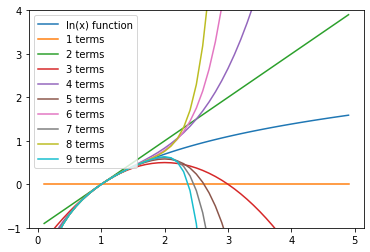

In [ ]:
values = np.arange(0.1,4.9,0.1)
teo_vals = np.log(values)

fig, ax = plt.subplots()
ax.plot(values,teo_vals)

# add lines for between 1 and 6 terms in the Taylor Series
for i in range(1,10):
    aprox_vals = [func_ln(value,i) for value in values]
    ax.plot(values,aprox_vals)

ax.set_ylim([-1,4])

# set up legend
legend_lst = ['ln(x) function']
for i in range(1,10):
    legend_lst.append(f'{i} terms')
ax.legend(legend_lst, loc=2)

plt.show()